# Utilizando complex Memory Schemas para operaciones avanzadas  
* En el ejercicio anterior, guardamos la memoria a largo plazo como un string de texto. En este, aprenderemos a usar un esquema más sofisticado y a aprovecharlo para operaciones avanzadas.

## Setup

#### After you download the code from the github repository in your computer
In terminal:
* cd project_name
* pyenv local 3.11.4
* poetry install
* poetry shell

#### To open the notebook with Jupyter Notebooks
In terminal:
* jupyter lab

Go to the folder of notebooks and open the right notebook.

#### To see the code in Virtual Studio Code or your editor of choice.
* open Virtual Studio Code or your editor of choice.
* open the project-folder
* open the 026-profile-schema.py file

## Create your .env file
* In the github repo we have included a file named .env.example
* Rename that file to .env file and here is where you will add your confidential api keys. Remember to include:
* OPENAI_API_KEY=your_openai_api_key
* LANGCHAIN_TRACING_V2=true
* LANGCHAIN_ENDPOINT=https://api.smith.langchain.com
* LANGCHAIN_API_KEY=your_langchain_api_key
* LANGCHAIN_PROJECT=your_project_name

We will call our LangSmith project **001-langgraph**.

## Track operations
From now on, we can track the operations **and the cost** of this project from LangSmith:
* [smith.langchain.com](https://smith.langchain.com)

## Connect with the .env file located in the same directory of this notebook

If you are using the pre-loaded poetry shell, you do not need to install the following package because it is already pre-loaded for you:

In [1]:
#pip install python-dotenv

In [2]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())
openai_api_key = os.environ["OPENAI_API_KEY"]

#### Install LangChain

If you are using the pre-loaded poetry shell, you do not need to install the following package because it is already pre-loaded for you:

In [3]:
#!pip install langchain

## Connect with an LLM

If you are using the pre-loaded poetry shell, you do not need to install the following package because it is already pre-loaded for you:

In [4]:
#!pip install langchain-openai

In [5]:
from langchain_openai import ChatOpenAI

chatModel35 = ChatOpenAI(model="gpt-3.5-turbo-0125")
chatModel4o = ChatOpenAI(model="gpt-4o")

## Definiendo el formato de la memoria de nuestro perfil de usuario (User Profile memory)

In [6]:
from typing import TypedDict, List

class UserProfile(TypedDict):
    """User profile schema with typed fields"""
    user_name: str  # The user's preferred name
    interests: List[str]  # A list of the user's interests

## Expliquemos lo que acabamos de hacer

Este código define una **estructura de datos personalizada (custom data structure)** llamada `UserProfile` utilizando `TypedDict` de Python. Aquí tienes un desglose en términos sencillos:

1. **Propósito**: Describe cómo debe organizarse un perfil de usuario y qué tipo de datos debe contener. Esto ayuda a que el código sea más claro y evita errores.

2. **Importación de módulos**:  
   - `TypedDict` se importa para crear un diccionario estructurado con tipos específicos para cada valor.  
   - `List` se importa para especificar que uno de los campos contendrá una lista de elementos.

3. **Definiendo `UserProfile`:**  
   - Es una **estructura similar a un diccionario** donde las claves (keys) y sus tipos de valores correspondientes están predefinidos.  
   - La clave `user_name` debe contener una **cadena de texto** (`str`).  
   - La clave `interests` debe contener una **lista de cadenas de texto** (`List[str]`).

4. **Explicación de los comentarios**:  
   - Cada campo tiene un comentario que explica su propósito:
     - `user_name`: El nombre preferido del usuario.  
     - `interests`: Una lista de cosas que le interesan al usuario.

#### Ejemplo de uso:
```python
profile: UserProfile = {
    "user_name": "Alice",
    "interests": ["programación", "lectura", "música"]
}
```

En este ejemplo:  
- `"user_name"` es un string de texto, `"Alice"`.  
- `"interests"` es una list de strings de texto, `["programación", "lectura", "música"]`.

## Ahora utilicemos el esquema de perfil de usuario (User Profile schema) anterior para guardar los datos de nuestro primer usuario en la Memory Store

In [7]:
# TypedDict instance
user_profile: UserProfile = {
    "user_name": "Julio",
    "interests": ["vespa", "AI", "SF"]
}

In [8]:
import uuid
from langgraph.store.memory import InMemoryStore

# Initialize the in-memory store
in_memory_store = InMemoryStore()

# Namespace for the memory to save
user_id = "1"
namespace_for_memory = (user_id, "memory")

# Save a memory to namespace as key and value
key = "user_profile"
value = user_profile
in_memory_store.put(namespace_for_memory, key, value)

## Expliquemos el código anterior en términos sencillos

El código anterior se basa en el ejemplo de `UserProfile` y muestra cómo **almacenar datos de usuario en memoria** utilizando la clase `InMemoryStore` de LangGraph. Aquí tienes una explicación paso a paso:

#### Crear un perfil de usuario
```python
user_profile: UserProfile = {
    "user_name": "Julio",
    "interests": ["vespa", "IA", "San Francisco"]
}
```
- Se crea un **diccionario de perfil de usuario** basado en la estructura `UserProfile`.  
- Contiene:
  - **user_name** = `"Julio"`  
  - **interests** = `["vespa", "IA", "San Francisco"]`

#### Importar los módulos necesarios
```python
import uuid
from langgraph.store.memory import InMemoryStore
```
- **`uuid`**: Útil para generar identificadores únicos (aún no se usa en este fragmento, pero podría usarse más adelante).  
- **`InMemoryStore`**: Una herramienta de LangGraph para **almacenar datos temporalmente** en memoria.

#### Inicializar el almacenamiento en memoria
```python
in_memory_store = InMemoryStore()
```
- Se crea una **instancia** de `InMemoryStore` para **guardar datos en memoria**.

#### Definir un namespace para el almacenamiento
```python
user_id = "1"
namespace_for_memory = (user_id, "memory")
```
- **`user_id = "1"`**: Representa el ID del usuario (en este caso, Julio).  
- **`namespace_for_memory = (user_id, "memory")`**: Combina el ID del usuario y una etiqueta ("memory") para crear un **namespace único**, permitiendo almacenar los datos organizadamente.

#### Guardar datos en la memoria
```python
key = "user_profile"
value = user_profile
in_memory_store.put(namespace_for_memory, key, value)
```
- **`key = "user_profile"`**: Define una **etiqueta** para los datos almacenados.  
- **`value = user_profile`**: Contiene el perfil de usuario definido anteriormente.  
- **`put()`**: Guarda los datos en memoria utilizando:
  - **namespace**: `(user_id, "memory")` – Organiza los datos por usuario o contexto.  
  - **Par key-value**: `"user_profile"` → `{user_name: "Julio", interests: [...]}`.

#### ¿Qué sucede en la memoria?
Los datos se almacenan en la memoria con la siguiente estructura:
```json
{
  ("1", "memory"): {
      "user_profile": {
          "user_name": "Julio",
          "interests": ["vespa", "IA", "San Francisco"]
      }
  }
}
```
Esto significa que ahora podemos recuperar y utilizar los datos del usuario en la aplicación mientras se mantenga en ejecución.

## OK. Ahora veamos cómo recuperar esta información de la Memory Store.  
* Como aprendimos en el ejercicio anterior, podemos usar [search](https://langchain-ai.github.io/langgraph/reference/store/#langgraph.store.base.BaseStore.search) para recuperar objetos del store por namespaces.

In [9]:
# Search 
for m in in_memory_store.search(namespace_for_memory):
    print(m.dict())

{'value': {'user_name': 'Julio', 'interests': ['vespa', 'AI', 'SF']}, 'key': 'user_profile', 'namespace': ['1', 'memory'], 'created_at': '2025-01-07T08:48:22.047331+00:00', 'updated_at': '2025-01-07T08:48:22.047333+00:00', 'score': None}


* Como recordarás, también podemos usar [get](https://langchain-ai.github.io/langgraph/reference/store/#langgraph.store.base.BaseStore.get) para recuperar un objeto específico mediante el namespace y la key.

In [10]:
# Get the memory by namespace and key
profile = in_memory_store.get(namespace_for_memory, "user_profile")
profile.value

{'user_name': 'Julio', 'interests': ['vespa', 'AI', 'SF']}

## Si usamos bind para vincular el schema de UserProfile con el modelo LLM, nuestra aplicación responderá con structured output (output estructurado)

In [11]:
from pydantic import BaseModel, Field

from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI

# Initialize the model
model = ChatOpenAI(model="gpt-4o", temperature=0)

# PAY ATTENTION HERE: see how we use the UserProfile schema
# Bind schema to model
model_with_structure = model.with_structured_output(UserProfile)

# PAY ATTENTION HERE: Using the bound model, now the app 
# will respond with structured output.
# Invoke the model to produce structured output that matches the schema
structured_output = model_with_structure.invoke([HumanMessage("My name is Julio, I like to drive my vespa.")])
structured_output

{'user_name': 'Julio', 'interests': ['driving vespa']}

## Revisemos lo que acabamos de hacer

El código anterior amplía el ejemplo previo y muestra cómo **usar el modelo LLM para procesar texto de entrada (input) y generar datos estructurados** que coincidan con el esquema `UserProfile`. Aquí tienes una explicación paso a paso:

#### Importar las bibliotecas necesarias
```python
from pydantic import BaseModel, Field
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
```

- **`pydantic`**: Ayuda a definir y validar estructuras de datos (aunque no se usa directamente aquí, es compatible con el schema).  
- **`HumanMessage`**: Representa un mensaje escrito por un humano, simulando la entrada (input) del usuario.  
- **`ChatOpenAI`**: Conecta con el modelo GPT de OpenAI para generar respuestas.

#### Inicializar el modelo de chat
```python
model = ChatOpenAI(model="gpt-4o", temperature=0)
```
- **`ChatOpenAI`**: Inicializa un modelo de IA (GPT-4o).  
- **`model="gpt-4o"`**: Especifica la versión del modelo de IA a utilizar.  
- **`temperature=0`**: Controla el nivel de aleatoriedad. 0 significa que el output será **consistente y predecible**.

#### Vincular el esquema al modelo
```python
model_with_structure = model.with_structured_output(UserProfile)
```
- **Propósito**: Asegura que la salida (output) del modelo coincida con el schema **`UserProfile`** definido previamente.  
- **Idea clave**: Obliga a la IA a **formatear su respuesta como datos estructurados** (diccionario) con los siguientes campos:  
  - `user_name` (cadena de texto).  
  - `interests` (lista de cadenas de texto).

#### Procesar la entrada (input) del usuario
```python
structured_output = model_with_structure.invoke(
    [HumanMessage("Me llamo Julio, me gusta conducir mi vespa.")]
)
```
- **Entrada**: Simula un mensaje humano: `"Me llamo Julio, me gusta conducir mi vespa."`  
- **`invoke()`**: Procesa la entrada con el modelo LLM y genera datos estructurados según el esquema.  
- **Salida estructurada**: El modelo LLM analiza el texto y devuelve la información en el formato requerido.

#### ¿Cómo se ve el output?
El output se formatea como un **diccionario válido de `UserProfile`**, por ejemplo:
```python
{
    "user_name": "Julio",
    "interests": ["vespa"]
}
```

#### ¿Cómo funciona?
1. **El modelo LLM procesa el mensaje**:  
   - Extrae el nombre ("Julio").  
   - Identifica el interés ("vespa").  

2. **Validación del esquema**:  
   - Asegura que el output coincida con la estructura de `UserProfile`.  
   - Devuelve datos estructurados en lugar de texto sin formato.

#### Caso de uso práctico
Imagina que estás construyendo un chatbot que recopila perfiles de usuario para ofrecer recomendaciones. En lugar de analizar manualmente los mensajes de los usuarios, el modelo LLM extrae y estructura la información automáticamente.

## Ahora podemos agregar este cambio al chatbot con memoria a largo plazo que construimos en el ejercicio anterior  
* **PRESTA ATENCIÓN**: observa cómo usamos la variable `new_memory` a continuación.

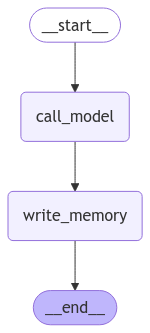

In [12]:
from IPython.display import Image, display

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.store.base import BaseStore

from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
from langchain_core.runnables.config import RunnableConfig

# Chatbot instruction
MODEL_SYSTEM_MESSAGE = """You are a helpful assistant with memory that provides information about the user. 
If you have memory for this user, use it to personalize your responses.
Here is the memory (it may be empty): {memory}"""

# Create new memory from the chat history and any existing memory
CREATE_MEMORY_INSTRUCTION = """Create or update a user profile memory based on the user's chat history. 
This will be saved for long-term memory. If there is an existing memory, simply update it. 
Here is the existing memory (it may be empty): {memory}"""

def call_model(state: MessagesState, config: RunnableConfig, store: BaseStore):

    """Load memory from the store and use it to personalize the chatbot's response."""
    
    # Get the user ID from the config
    user_id = config["configurable"]["user_id"]

    # Retrieve memory from the store
    namespace = ("memory", user_id)
    existing_memory = store.get(namespace, "user_memory")

    # Format the memories for the system prompt
    if existing_memory and existing_memory.value:
        memory_dict = existing_memory.value
        formatted_memory = (
            f"Name: {memory_dict.get('user_name', 'Unknown')}\n"
            f"Interests: {', '.join(memory_dict.get('interests', []))}"
        )
    else:
        formatted_memory = None

    # Format the memory in the system prompt
    system_msg = MODEL_SYSTEM_MESSAGE.format(memory=formatted_memory)

    # Respond using memory as well as the chat history
    response = model.invoke([SystemMessage(content=system_msg)]+state["messages"])

    return {"messages": response}

def write_memory(state: MessagesState, config: RunnableConfig, store: BaseStore):

    """Reflect on the chat history and save a memory to the store."""
    
    # Get the user ID from the config
    user_id = config["configurable"]["user_id"]

    # Retrieve existing memory from the store
    namespace = ("memory", user_id)
    existing_memory = store.get(namespace, "user_memory")

    # Format the memories for the system prompt
    if existing_memory and existing_memory.value:
        memory_dict = existing_memory.value
        formatted_memory = (
            f"Name: {memory_dict.get('user_name', 'Unknown')}\n"
            f"Interests: {', '.join(memory_dict.get('interests', []))}"
        )
    else:
        formatted_memory = None
        
    # Format the existing memory in the instruction
    system_msg = CREATE_MEMORY_INSTRUCTION.format(memory=formatted_memory)

    # PAY ATTENTION: here is where we define the new_memory variable.
    # Invoke the model to produce structured output that matches the schema
    new_memory = model_with_structure.invoke([SystemMessage(content=system_msg)]+state['messages'])

    # Overwrite the existing use profile memory
    key = "user_memory"
    store.put(namespace, key, new_memory)

# Define the graph
builder = StateGraph(MessagesState)
builder.add_node("call_model", call_model)
builder.add_node("write_memory", write_memory)
builder.add_edge(START, "call_model")
builder.add_edge("call_model", "write_memory")
builder.add_edge("write_memory", END)

# Store for long-term (across-thread) memory
across_thread_memory = InMemoryStore()

# Checkpointer for short-term (within-thread) memory
within_thread_memory = MemorySaver()

# Compile the graph with the checkpointer fir and store
graph = builder.compile(checkpointer=within_thread_memory, store=across_thread_memory)

# View
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

## Este código es muy similar al que usamos en el último ejercicio  

El código anterior crea un **chatbot con memoria** utilizando LangGraph, el modelo LLM de OpenAI y almacenamiento estructurado de memoria. Garantiza que el chatbot pueda **recordar información del usuario** y **actualizar su memoria** en función de nuevas conversaciones. Aquí tienes una explicación paso a paso:

#### Importar las bibliotecas necesarias
```python
from IPython.display import Image, display
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.store.base import BaseStore

from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
from langchain_core.runnables.config import RunnableConfig
```
- Se importan bibliotecas para **gestionar la memoria**, **flujos de trabajo basados en graphs** y **manejo de mensajes**.  
- `Image` y `display` se utilizan para **visualizar el flujo de trabajo** más adelante.

#### Mensajes del sistema e instrucciones
```python
MODEL_SYSTEM_MESSAGE = """You are a helpful assistant with memory... {memory}"""
CREATE_MEMORY_INSTRUCTION = """Create or update a user profile memory... {memory}"""
```
- Definen los **prompts del sistema** para el modelo LLM.  
- **`MODEL_SYSTEM_MESSAGE`**: Indica al chatbot que **use la memoria** (si está disponible) para **personalizar respuestas**.  
- **`CREATE_MEMORY_INSTRUCTION`**: Indica al chatbot que **actualice la memoria** después de cada interacción.

#### Función de respuesta del chatbot
```python
def call_model(state: MessagesState, config: RunnableConfig, store: BaseStore):
```
Esta función genera **respuestas** para el chatbot:

**1. Recuperar la memoria del usuario**
```python
user_id = config["configurable"]["user_id"]
namespace = ("memory", user_id)
existing_memory = store.get(namespace, "user_memory")
```
- Obtiene la memoria del usuario (si existe) según su **ID**.

**2. Formatear la memoria**
```python
formatted_memory = (
    f"Nombre: {memory_dict.get('user_name', 'Desconocido')}\n"
    f"Intereses: {', '.join(memory_dict.get('interests', []))}"
)
```
- Prepara la memoria (nombre e intereses) como **resumen de texto** para la IA.

**3. Generar respuesta**
```python
response = model.invoke([SystemMessage(content=system_msg)] + state["messages"])
```
- Combina la memoria con el historial de chat y **activa el modelo de IA** para generar una respuesta personalizada.

#### Función para actualizar la memoria
```python
def write_memory(state: MessagesState, config: RunnableConfig, store: BaseStore):
```
Esta función **actualiza la memoria** después de procesar un mensaje del usuario:

1. **Recupera la memoria existente** de la misma manera que antes.  
2. **Formatea la instrucción para actualizar la memoria**
```python
system_msg = CREATE_MEMORY_INSTRUCTION.format(memory=formatted_memory)
```
- Prepara instrucciones para que el modelo LLM **actualice la memoria** con base en la conversación más reciente.  
3. **Ejecuta el modelo para actualizar la memoria**
```python
new_memory = model_with_structure.invoke([SystemMessage(content=system_msg)]+state['messages'])
```
- El modelo LLM actualiza la memoria (por ejemplo, agrega nuevos intereses).  
4. **Guarda la memoria actualizada**
```python
store.put(namespace, key, new_memory)
```
- Sobrescribe la **memoria del usuario** en el almacenamiento.

#### Definir el flujo de trabajo graphs**
```python
builder = StateGraph(MessagesState)
```
- Define un **flujo de trabajo basado en graphs** para controlar el proceso del chatbot paso a paso.

#### Nodos y edges**
```python
builder.add_node("call_model", call_model)
builder.add_node("write_memory", write_memory)
builder.add_edge(START, "call_model")
builder.add_edge("call_model", "write_memory")
builder.add_edge("write_memory", END)
```
- **Nodos**: Representan pasos en el proceso (generar respuesta → actualizar memoria).  
- **Edges**: Definen la **secuencia** de pasos.  
  - Inicio → Responder → Actualizar Memoria → Fin.

#### Configurar la memoria**
```python
across_thread_memory = InMemoryStore()
within_thread_memory = MemorySaver()
```
- **`across_thread_memory`**: Memoria a largo plazo (persiste entre sesiones).  
- **`within_thread_memory`**: Memoria a corto plazo (se borra al finalizar la conversación).

#### Compilar y visualizar el workflow**
```python
graph = builder.compile(checkpointer=within_thread_memory, store=across_thread_memory)
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))
```
- **Compila** el graph con los sistemas de memoria adjuntos.  
- **Visualiza** el flujo de trabajo como un **diagrama** para ver cómo se conectan los steps.

#### Ejemplo de interacción**
1. **Usuario:** `"Me llamo Julio y me gusta la IA."`  
2. **Chatbot:** `"¡Hola Julio! La IA es fascinante. ¿Qué más te interesa?"`  
3. **Actualización de memoria:** Guarda `"Julio"` como el nombre y agrega `"IA"` a la lista de intereses.  
4. **Siguiente interacción:** `"Háblame sobre los robots."`  
5. **Chatbot:** `"Dado que te gusta la IA, es posible que también disfrutes hablando sobre robots."`  

Este sistema permite que el chatbot **recuerde conversaciones previas** y **personalice las respuestas** de manera más natural.

## Probemos este nuevo chatbot y veamos cómo guarda la información del usuario en la memoria del perfil de usuario (User Profile memory)

In [13]:
# We supply a thread ID for short-term (within-thread) memory
# We supply a user ID for long-term (across-thread) memory 
config = {"configurable": {"thread_id": "1", "user_id": "1"}}

# User input 
input_messages = [HumanMessage(content="Hi, my name is Julio and I like to drive my vespa around San Francisco and eat at Whole Foods.")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

Hi, my name is Julio and I like to drive my vespa around San Francisco and eat at Whole Foods.
================================== Ai Message ==================================

Hi Julio! That sounds like a lot of fun. San Francisco is a great city to explore on a Vespa, and Whole Foods has some delicious options. Do you have any favorite spots or foods you like to get there?


In [14]:
# Namespace for the memory to save
user_id = "1"
namespace = ("memory", user_id)
existing_memory = across_thread_memory.get(namespace, "user_memory")
existing_memory.value

{'user_name': 'Julio',
 'interests': ['driving Vespa',
  'exploring San Francisco',
  'eating at Whole Foods']}

## Revisemos lo que acabamos de hacer  

El código anterior demuestra cómo **ejecutar el chatbot con memoria** e **inspeccionar la memoria actualizada del usuario** después de procesar la entrada (el input). Aquí tienes una explicación paso a paso:

#### Configurar los ajustes de memoria  
```python
config = {"configurable": {"thread_id": "1", "user_id": "1"}}
```
- **`thread_id`**: Rastrea la **memoria a corto plazo** para la sesión actual.  
- **`user_id`**: Rastrea la **memoria a largo plazo** que persiste entre sesiones.  
- Estos IDs se utilizan para **organizar la memoria** por usuario y sesión.

#### Proporcionar entrada del usuario  
```python
input_messages = [HumanMessage(
    content="Hola, me llamo Julio y me gusta conducir mi vespa por San Francisco y comer en Whole Foods."
)]
```
- **Simula un mensaje del usuario**: Julio se presenta y comparte sus intereses.  
- **`HumanMessage`**: Marca la entrada (el input) como un mensaje del usuario.

#### Procesar el input en el graph
```python
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()
```
- **Procesa el input paso a paso** a través del **flujo de trabajo del graph** (definido previamente).  
- **Flujo de procesamiento**:  
  1. **Call Model**: Usa la memoria para personalizar la respuesta.  
  2. **Write Memory**: Actualiza la memoria a largo plazo con los nuevos detalles.  
- **Imprimir la respuesta**:
  - Muestra la **respuesta generada por la IA (el modelo LLM)** después de analizar el input del usuario.  
  - **`pretty_print()`**: Formatea la salida para que sea más legible.

#### Recuperar la memoria actualizada
```python
user_id = "1"
namespace = ("memory", user_id)
existing_memory = across_thread_memory.get(namespace, "user_memory")
existing_memory.value
```
- **Accede a la memoria guardada**:  
  - **`across_thread_memory`**: Almacena la memoria a largo plazo entre sesiones.  
  - **`namespace`**: Recupera la memoria asociada al **usuario con ID = "1"**.  
  - **`get`**: Recupera los datos almacenados bajo la clave `"user_memory"`.  

- **Inspeccionar la memoria**:
  - Muestra el perfil actualizado almacenado en la memoria según la entrada del usuario.  

#### Ejemplo de salida: contenido de la memoria
```python
{
    "user_name": "Julio",
    "interests": ["vespa", "San Francisco", "Whole Foods"]
}
```
- **Actualización de memoria**:  
  - La IA (el modelo LLM) ha:
    1. Extraído el **nombre** ("Julio").  
    2. Agregado los **intereses**: `"vespa"`, `"San Francisco"` y `"Whole Foods"`.  

#### Características clave
1. **Personalización**: El chatbot usa la memoria almacenada para generar **respuestas con contexto**.  
2. **Aprendizaje de conversaciones**: La memoria se actualiza con **nueva información** a medida que avanza el chat.  
3. **Persistencia de memoria**: La memoria a largo plazo permite que el chatbot **recuerde detalles** incluso después de reiniciar.  
4. **Output en tiempo real**: Las respuestas se generan y muestran **en flujo**, paso a paso.  

#### Ejemplo de interacción
1. **Entrada del usuario**  
   `"Hola, me llamo Julio y me gusta conducir mi vespa por San Francisco y comer en Whole Foods."`

2. **Respuesta del chatbot**  
   `"¡Hola Julio! Qué genial que disfrutes conducir tu vespa por San Francisco. Whole Foods es un excelente lugar para comer."`

3. **Verificación de memoria**  
   **Antes del chat:**  
   ```
   {}
   ```
   **Después del chat:**  
   ```
   {
       "user_name": "Julio",
       "interests": ["vespa", "San Francisco", "Whole Foods"]
   }
   ```

#### Conclusión  
Este sistema crea un **chatbot inteligente** que puede **aprender y recordar las preferencias del usuario** con el tiempo. Procesa el input del usuario, **actualiza su memoria** y **recupera la información almacenada** cuando es necesario, haciendo que las conversaciones sean **personalizadas y consistentes**.

## Eso funcionó bien. Veamos cómo funciona la aplicación anterior si definimos un schema de memoria (Memory Schema) más complejo.

In [15]:
from typing import List, Optional

class OutputFormat(BaseModel):
    preference: str
    sentence_preference_revealed: str

class TelegramPreferences(BaseModel):
    preferred_encoding: Optional[List[OutputFormat]] = None
    favorite_telegram_operators: Optional[List[OutputFormat]] = None
    preferred_telegram_paper: Optional[List[OutputFormat]] = None

class MorseCode(BaseModel):
    preferred_key_type: Optional[List[OutputFormat]] = None
    favorite_morse_abbreviations: Optional[List[OutputFormat]] = None

class Semaphore(BaseModel):
    preferred_flag_color: Optional[List[OutputFormat]] = None
    semaphore_skill_level: Optional[List[OutputFormat]] = None

class TrustFallPreferences(BaseModel):
    preferred_fall_height: Optional[List[OutputFormat]] = None
    trust_level: Optional[List[OutputFormat]] = None
    preferred_catching_technique: Optional[List[OutputFormat]] = None

class CommunicationPreferences(BaseModel):
    telegram: TelegramPreferences
    morse_code: MorseCode
    semaphore: Semaphore

class UserPreferences(BaseModel):
    communication_preferences: CommunicationPreferences
    trust_fall_preferences: TrustFallPreferences

# PAY ATTENTION HERE: this is the complex schema we will use
class TelegramAndTrustFallPreferences(BaseModel):
    pertinent_user_preferences: UserPreferences

In [16]:
from pydantic import ValidationError

# Bind schema to model
model_with_structure = model.with_structured_output(TelegramAndTrustFallPreferences)

# Conversation
conversation = """Operator: How may I assist with your telegram, sir?
Customer: I need to send a message about our trust fall exercise.
Operator: Certainly. Morse code or standard encoding?
Customer: Morse, please. I love using a straight key.
Operator: Excellent. What's your message?
Customer: Tell him I'm ready for a higher fall, and I prefer the diamond formation for catching.
Operator: Done. Shall I use our "Daredevil" paper for this daring message?
Customer: Perfect! Send it by your fastest carrier pigeon.
Operator: It'll be there within the hour, sir."""

# PAY ATTENTION: do not get distracted by the <convo> tag here. We will explain it below.
# Invoke the model
try:
    model_with_structure.invoke(f"""Extract the preferences from the following conversation:
    <convo>
    {conversation}
    </convo>""")
except ValidationError as e:
    print(e)

1 validation error for TelegramAndTrustFallPreferences
pertinent_user_preferences.communication_preferences.semaphore
  Input should be a valid dictionary or instance of Semaphore [type=model_type, input_value=None, input_type=NoneType]
    For further information visit https://errors.pydantic.dev/2.10/v/model_type


## ¡Ups! Eso no ha funcionado muy bien. ¿Qué ha pasado?

El código anterior intenta **extraer preferencias estructuradas** sobre métodos de comunicación y preferencias en "trust falls" (ejercicios de confianza en grupo) a partir de una conversación dada. Utiliza **modelos de Pydantic** para definir la estructura de los datos y luego **vincula esa estructura** a un modelo de IA (un modelo LLM) para garantizar que el output siga el formato esperado. Sin embargo, **falla debido a un error de validación**. Aquí tienes una explicación paso a paso:

#### Definición de Data Models (Schemas)

**Data Model (Schema) básico: `OutputFormat`**
```python
class OutputFormat(BaseModel):
    preference: str
    sentence_preference_revealed: str
```
- Define la **estructura de las preferencias** con dos campos obligatorios:
  - **`preference`**: Describe la preferencia del usuario.  
  - **`sentence_preference_revealed`**: Almacena la frase en la que se mencionó la preferencia.  

#### Preferencias de comunicación
Los modelos **`TelegramPreferences`**, **`MorseCode`** y **`Semaphore`** definen preferencias para **diferentes métodos de comunicación** (telegrama, código Morse, Semaphore).  
- Cada modelo incluye **listas opcionales** de objetos `OutputFormat`.

Ejemplo:
```python
class MorseCode(BaseModel):
    preferred_key_type: Optional[List[OutputFormat]] = None
    favorite_morse_abbreviations: Optional[List[OutputFormat]] = None
```
- Almacena preferencias sobre **tipos de keys en Morse** y **abreviaciones favoritas**.  
- Estas propiedades son **opcionales** (pueden estar ausentes o ser `None`).

#### Preferencias en Trust Fall**
```python
class TrustFallPreferences(BaseModel):
    preferred_fall_height: Optional[List[OutputFormat]] = None
    trust_level: Optional[List[OutputFormat]] = None
    preferred_catching_technique: Optional[List[OutputFormat]] = None
```
- Define preferencias en **Trust Fall**, como:
  - Fall height.  
  - Trust level.  
  - Catching technique.  

#### Estructuras anidadas
```python
class CommunicationPreferences(BaseModel):
    telegram: TelegramPreferences
    morse_code: MorseCode
    semaphore: Semaphore
```
- Combina todos los métodos de comunicación en un solo modelo.

```python
class UserPreferences(BaseModel):
    communication_preferences: CommunicationPreferences
    trust_fall_preferences: TrustFallPreferences
```
- Une **preferencias de comunicación** y **preferencias en trust falls**.

```python
class TelegramAndTrustFallPreferences(BaseModel):
    pertinent_user_preferences: UserPreferences
```
- **Modelo final** que encapsula todas las preferencias en una sola estructura.

#### Vincular (bind) con el modelo LLM
```python
model_with_structure = model.with_structured_output(TelegramAndTrustFallPreferences)
```
- Obliga a la IA a generar un output que coincida con la estructura **`TelegramAndTrustFallPreferences`**.  
- Asegura que la respuesta siga el **esquema de datos anidado**.

#### ¿Dónde ocurrió el error?

#### Input del usuario
```python
conversation = """Operator: How may I assist with your telegram, sir?
Customer: I need to send a message about our trust fall exercise.
..."""
```
- La conversación menciona preferencias como:
  - Tipo de tecla Morse: **"straight key"**.  
  - Altura de caída: **"higher fall"**.  
  - Técnica de captura: **"diamond formation"**.  
  - Tipo de papel: **"Daredevil paper"**.  

#### Error al invocar el modelo
```python
1 validation error for TelegramAndTrustFallPreferences
pertinent_user_preferences.communication_preferences.semaphore
  Input should be a valid dictionary or instance of Semaphore [type=model_type, input_value=None, input_type=NoneType]
```

#### ¿Qué pasó?
- La IA (el modelo lLM) **no generó datos** para el campo **`semaphore`** en `communication_preferences`.  
- En su lugar, devolvió **`None`**, pero el esquema **requiere un objeto válido** de tipo **`Semaphore`**, incluso si todos sus campos están vacíos.

#### ¿Por qué ocurrió?
- **El schema espera que el campo `semaphore` exista** en el output, incluso si no tiene datos.  
- **Pero la IA (el modelo lLM) omitió por completo este campo**, devolviendo `None`, lo que no es un objeto válido según el modelo `Semaphore`.  

#### Soluciones posibles
1. **Permitir `None` como valor válido** en el esquema:
   ```python
   class CommunicationPreferences(BaseModel):
       telegram: Optional[TelegramPreferences] = None
       morse_code: Optional[MorseCode] = None
       semaphore: Optional[Semaphore] = None  # Permitir que sea None
   ```
   - Esto evitaría la validación estricta y aceptaría `None`.

2. **Modificar la instrucción a la IA** para que siempre genere una estructura completa, incluso con valores vacíos:
   ```python
   "Ensure that all fields are present in the response, even if they contain empty lists or null values."
   ```
   - Forzar a la IA a incluir `semaphore` en la respuesta.

3. **Agregar valores predeterminados en los modelos**:
   ```python
   class Semaphore(BaseModel):
       flag_positions: List[OutputFormat] = []
   ```
   - Así, `semaphore` nunca será `None`, sino al menos una estructura vacía.

#### Conclusión
El problema surgió porque **la IA (el modelo LLM) omitió un campo que el schema esperaba explícitamente**. La solución es:
- **Permitir valores `None` en la estructura**,  
- **Forzar a la IA a devolver una estructura completa**,  
- **O definir valores predeterminados en el esquema**.  

¡Ahora podemos ajustar el código y hacer que la memoria estructurada funcione correctamente!

## ¿Qué está haciendo la etiqueta `<convo>` en el código anterior?

En el código anterior, la etiqueta `<convo>` se usa para envolver el texto de la conversación antes de pasarlo al modelo. Sin embargo, **no es una característica predefinida de LangGraph o Pydantic; simplemente es una convención definida por el desarrollador para estructurar la entrada de texto.**

#### ¿Qué hace `<convo>` en este código?
1. **Encapsulación**: Actúa como un contenedor que delimita la conversación dentro del texto de entrada.  
2. **Pista contextual para el modelo**: Ayuda a que el modelo identifique que el texto dentro de la etiqueta es un diálogo del cual debe extraer preferencias estructuradas.  
3. **No es procesado especialmente por LangGraph**: LangGraph no interpreta `<convo>`, simplemente forma parte del formato del prompt.  
4. **Uso potencial como XML-like**: Algunos modelos de lenguaje pueden reconocer etiquetas estilo XML (`<convo>` en este caso) y utilizarlas para estructurar mejor la información y extraer datos con mayor precisión.  

#### ¿Por qué usar `<convo>`?
- Separa visualmente la conversación de la instrucción (`Extrae las preferencias de la siguiente conversación:`).  
- Si el modelo ha sido entrenado para reconocer estructuras similares a XML, esto puede mejorar la precisión en el análisis.  
- Evita confusiones al procesar textos de múltiples líneas dentro del pipeline de LLM.  
#### ¿Qué sucede cuando se invoca el modelo?
1. El **texto de la conversación** (envuelto en `<convo>`) se envía a `model_with_structure.invoke(...)`.  
2. El **modelo estructurado (`TelegramAndTrustFallPreferences`)** espera que la IA extraiga preferencias del usuario de la conversación.  
3. El **LLM procesa el diálogo** y mapea la información a la estructura esperada.  
4. Si la salida generada no coincide con el esquema de Pydantic, se genera un **`ValidationError`**.  

#### Ejemplo de extracción esperada
A partir de la conversación dada, el modelo podría extraer:

```json
{
  "pertinent_user_preferences": {
    "communication_preferences": {
      "telegram": {
        "preferred_telegram_paper": [
          {
            "preference": "Daredevil",
            "sentence_preference_revealed": "Shall I use our 'Daredevil' paper for this daring message?"
          }
        ]
      },
      "morse_code": {
        "preferred_key_type": [
          {
            "preference": "straight key",
            "sentence_preference_revealed": "Morse, please. I love using a straight key."
          }
        ]
      }
    },
    "trust_fall_preferences": {
      "preferred_fall_height": [
        {
          "preference": "higher fall",
          "sentence_preference_revealed": "Tell him I'm ready for a higher fall."
        }
      ],
      "preferred_catching_technique": [
        {
          "preference": "diamond formation",
          "sentence_preference_revealed": "I prefer the diamond formation for catching."
        }
      ]
    }
  }
}
```

#### Conclusión
- `<convo>` **no es** una función especial de LangGraph o Pydantic.  
- Es **una convención del desarrollador** para estructurar la conversación dentro del prompt.  
- **Facilita la extracción de preferencias** al delimitar claramente el bloque de conversación.  
- **El esquema de Pydantic valida** que la salida generada por la IA cumpla con la estructura esperada.

## Solucionando estos problemas con TrustCall
* En el código anterior, adoptamos el enfoque de regenerar el schema de **Profile** desde cero cada vez que elegíamos guardar una nueva memoria. Esto es ineficiente, ya que potencialmente desperdicia tokens si el schema contiene mucha información que debe regenerarse cada vez. Además, podríamos perder información al regenerar el perfil desde cero.  
* Además, los schemas complejos pueden ser difíciles de extraer.  
* Podemos resolver muchos de estos problemas utilizando la biblioteca de código abierto [TrustCall](https://github.com/hinthornw/trustcall), desarrollada por uno de los miembros del equipo de LangChain.

## Primero, veamos cómo funciona TrustCall con un ejemplo sencillo

In [17]:
# PAY ATTENTION: this is the conversation variable we will use below.
conversation = [HumanMessage(content="Hi, I'm Julio."), 
                AIMessage(content="Nice to meet you, Julio."), 
                HumanMessage(content="I am interested in Gen AI startups.")]

In [18]:
# PAY ATTENTION: here is where we import create_extractor from truscall
from trustcall import create_extractor

# Schema 
class UserProfile(BaseModel):
    """User profile schema with typed fields"""
    user_name: str = Field(description="The user's preferred name")
    interests: List[str] = Field(description="A list of the user's interests")

# Initialize the model
model = ChatOpenAI(model="gpt-4o", temperature=0)

# Create the extractor
trustcall_extractor = create_extractor(
    model,
    tools=[UserProfile],
    tool_choice="UserProfile"
)

# Instruction
system_msg = "Extract the user profile from the following conversation"

# PAY ATTENTION: See how we use the extractor and compare it with the previous approach.
# Invoke the extractor
result = trustcall_extractor.invoke({"messages": [SystemMessage(content=system_msg)]+conversation})

In [19]:
for m in result["messages"]: 
    m.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  UserProfile (call_B0RGcNrAOMYuWsgw2oYn2Gta)
 Call ID: call_B0RGcNrAOMYuWsgw2oYn2Gta
  Args:
    user_name: Julio
    interests: ['Gen AI startups']


## Veamos qué acabamos de hacer

Este ejemplo demuestra cómo usar **TrustCall**, una biblioteca diseñada para **simplificar la extracción de schemas** en conversaciones, haciéndola más **eficiente** y **fiable** que regenerar perfiles desde cero en cada ocasión. Aquí tienes una explicación paso a paso:

#### El problema con los enfoques anteriores
- Los métodos anteriores requerían regenerar **todo el schema del perfil** cada vez que el chatbot actualizaba la memoria.  
- **Problemas:**
  1. **Ineficiencia**: Se desperdician tokens al regenerar todos los datos, incluso las partes que no han cambiado.  
  2. **Riesgo de pérdida de datos**: Información importante podría ser **sobrescrita** o perdida.  
  3. **Schemas complejos**: Extraer información de schemas grandes y anidados es difícil y propenso a errores.  

**Solución**: **TrustCall**, una herramienta para **actualizar campos específicos** en schemas sin regenerar toda la estructura.

#### Ejemplo de TrustCall

**Paso 1: Datos de la conversación**
```python
conversation = [
    HumanMessage(content="Hola, soy Julio."), 
    AIMessage(content="Encantado de conocerte, Julio."), 
    HumanMessage(content="Estoy interesado en startups de IA Generativa.")
]
```
- **Simulación de chat**:
  - Julio se presenta y menciona su interés en **startups de IA Generativa**.  
- Estos datos serán **procesados para extraer información del usuario**.


**Paso 2: Definir el schema**
```python
class UserProfile(BaseModel):
    """Esquema de perfil de usuario con campos tipados"""
    user_name: str = Field(description="El nombre preferido del usuario")
    interests: List[str] = Field(description="Una lista de intereses del usuario")
```
- Define la **estructura de datos** para el perfil del usuario:
  - **`user_name`**: Almacena el nombre del usuario (string de texto).  
  - **`interests`**: Almacena una **list de intereses** (permite múltiples valores).  
- Cada campo tiene una **descripción** para ayudar a la IA (el modelo LLM) a comprender qué datos debe asignar.


**Paso 3: Inicializar el modelo**
```python
model = ChatOpenAI(model="gpt-4o", temperature=0)
```
- Se usa **GPT-4o** como modelo de IA.  
- **`temperature=0`** garantiza **salidas consistentes**.

**Paso 4: Crear el extractor**
```python
trustcall_extractor = create_extractor(
    model,
    tools=[UserProfile],  # Esquema para la extracción
    tool_choice="UserProfile"  # Se enfoca solo en este esquema
)
```
- Se crea el **Extractor de TrustCall** para **analizar y extraer datos** según el esquema definido.  
- **`tools`**: Especifica el esquema a utilizar (`UserProfile`).  
- **`tool_choice`**: Asegura que la IA (el modelo LLM) **solo use este esquema**, evitando datos no relacionados.

**Paso 5: Definir instrucciones**
```python
system_msg = "Extrae el perfil del usuario de la siguiente conversación"
```
- Proporciona una **instrucción clara** para extraer **información del usuario** desde el chat.  
- Mantiene la IA (el modelo LLM) **enfocada en la extracción del esquema**, en lugar de respuestas abiertas.


**Paso 6: Invocar el extractor**
```python
result = trustcall_extractor.invoke(
    {"messages": [SystemMessage(content=system_msg)] + conversation}
)
```
- **Procesa la conversación** usando el esquema y la instrucción.  
- **Extrae los campos relevantes** (por ejemplo, nombre e intereses) dentro de la estructura `UserProfile`.  
- Automáticamente **rellena solo los campos necesarios** sin sobrescribir datos existentes.


**Paso 7: Mostrar resultados**
```python
for m in result["messages"]: 
    m.pretty_print()
```
- Imprime los **datos extraídos** en un formato estructurado y **legible**.

#### Output de ejemplo
```
{
    "user_name": "Julio",
    "interests": ["startups de IA Generativa"]
}
```
- Datos extraídos:
  - **`user_name`**: "Julio" (desde el primer mensaje del usuario).  
  - **`interests`**: ["startups de IA Generativa"] (desde el segundo mensaje del usuario).  

#### ¿Por qué TrustCall es mejor?

1. **Eficiencia**:  
   - Solo **actualiza los campos** necesarios, ahorrando tokens y reduciendo costos de API.  

2. **Fiabilidad**:  
   - Conserva **datos existentes** y evita sobrescrituras accidentales.  

3. **Escalabilidad**:  
   - Maneja **esquemas complejos** sin necesidad de procesamiento manual.  

4. **Flexibilidad**:  
   - Funciona con **campos específicos**, permitiendo actualizaciones parciales.  

5. **Facilidad de uso**:  
   - Requiere una configuración mínima: solo define el schema y deja que el extractor haga el resto.

#### Reflexión final

Este ejemplo muestra cómo **TrustCall** puede simplificar la **extracción de datos y actualización de memoria** en flujos de trabajo de IA. En lugar de **reconstruir el perfil** cada vez, **solo actualiza las partes relevantes**, haciéndolo más rápido, fiable y adecuado para **schemas complejos**.

## Ahora que estamos más familiarizados con TrustCall, probémoslo con nuestro caso problemático

In [20]:
# PAY ATTENTION: here is where we create the extractor.
# See that the variable name "bound" is not a very good choice by the LG team.
bound = create_extractor(
    model,
    tools=[TelegramAndTrustFallPreferences],
    tool_choice="TelegramAndTrustFallPreferences",
)

# Conversation
conversation = """Operator: How may I assist with your telegram, sir?
Customer: I need to send a message about our trust fall exercise.
Operator: Certainly. Morse code or standard encoding?
Customer: Morse, please. I love using a straight key.
Operator: Excellent. What's your message?
Customer: Tell him I'm ready for a higher fall, and I prefer the diamond formation for catching.
Operator: Done. Shall I use our "Daredevil" paper for this daring message?
Customer: Perfect! Send it by your fastest carrier pigeon.
Operator: It'll be there within the hour, sir."""

# PAY ATTENTION: bound is the name of the extractor we created before
result = bound.invoke(
    f"""Extract the preferences from the following conversation:
<convo>
{conversation}
</convo>"""
)

# Extract the preferences
result["responses"][0]

TelegramAndTrustFallPreferences(pertinent_user_preferences=UserPreferences(communication_preferences=CommunicationPreferences(telegram=TelegramPreferences(preferred_encoding=[OutputFormat(preference='Morse', sentence_preference_revealed='Morse code or standard encoding?')], favorite_telegram_operators=None, preferred_telegram_paper=[OutputFormat(preference='Daredevil', sentence_preference_revealed='Shall I use our "Daredevil" paper for this daring message?')]), morse_code=MorseCode(preferred_key_type=[OutputFormat(preference='straight key', sentence_preference_revealed='I love using a straight key.')], favorite_morse_abbreviations=None), semaphore=Semaphore(preferred_flag_color=None, semaphore_skill_level=None)), trust_fall_preferences=TrustFallPreferences(preferred_fall_height=[OutputFormat(preference='higher', sentence_preference_revealed="I'm ready for a higher fall.")], trust_level=None, preferred_catching_technique=[OutputFormat(preference='diamond formation', sentence_preference_

## OK, esta vez nuestro código funcionó. Veamos lo que ha pasado.

El código anterior se basa en el ejemplo de **TrustCall** y demuestra cómo usarlo para **extraer preferencias complejas**, específicamente **preferencias de Telegram y Trust Fall**, a partir de una conversación. Aquí tienes una explicación sencilla paso a paso:

#### Crear un Extractor con TrustCall
```python
bound = create_extractor(
    model,
    tools=[TelegramAndTrustFallPreferences],
    tool_choice="TelegramAndTrustFallPreferences",
)
```
- **Propósito**: Configura un **extractor TrustCall** para trabajar con el **schema `TelegramAndTrustFallPreferences`** previamente definido.  
- **Parámetros**:  
  - **`tools=[TelegramAndTrustFallPreferences]`**: Especifica el esquema a utilizar para la extracción.  
  - **`tool_choice="TelegramAndTrustFallPreferences"`**: Asegura que la IA (el modelo LLM) se enfoque solo en este schema, ignorando información no relacionada.  

Este paso prepara el extractor para **mapear datos de la conversación** dentro del **schema complejo** con preferencias anidadas.

#### Conversación de Entrada
```python
conversation = """Operador: ¿En qué puedo ayudarle con su telegrama, señor?
Cliente: Necesito enviar un mensaje sobre nuestro ejercicio de caída de confianza.
Operador: Por supuesto. ¿Código Morse o codificación estándar?
Cliente: Morse, por favor. Me encanta usar una llave recta.
Operador: Excelente. ¿Cuál es su mensaje?
Cliente: Dígale que estoy listo para una caída más alta y que prefiero la formación diamante para atraparme.
Operador: Listo. ¿Desea que usemos nuestro papel "Daredevil" para este audaz mensaje?
Cliente: ¡Perfecto! Envíelo con su paloma mensajera más rápida.
Operador: Estará allí en menos de una hora, señor."""
```
- Esta es una **conversación simulada** entre un operador y un cliente.  
- Contiene **preferencias ocultas** sobre:  
  1. **Configuración del telegrama** (tipo de papel, velocidad de entrega).  
  2. **Preferencias de caída de confianza** (altura de la caída, técnica de captura).  
  3. **Preferencias de código Morse** (tipo de llave).  

#### Invocar el Extractor
```python
result = bound.invoke(
    f"""Extrae las preferencias de la siguiente conversación:
<convo>
{conversation}
</convo>"""
)
```
- **Propósito**: Envía la conversación al **extractor TrustCall** junto con una instrucción para **extraer las preferencias**.  
- **Formato del Mensaje**: Envuelve la conversación dentro de etiquetas similares a XML `<convo>` para **ayudar al modelo a enfocarse** en el contenido relevante.  
- **Resultado**: Devuelve las preferencias extraídas en el formato de schema especificado.

#### Acceder a las Preferencias Extraídas
```python
result["responses"][0]
```
- Recupera la **primera respuesta** del resultado, que contiene las **preferencias estructuradas** extraídas de la conversación.

## Hablemos de la respuesta que hemos obtenido

El output que hemos recibido es una **representación estructurada** de las preferencias del usuario extraídas de la conversación, organizadas en el schema complejo definido anteriormente. Analicémoslo paso a paso en términos sencillos:

#### Schema de Nivel Superior
```python
TelegramAndTrustFallPreferences(
    pertinent_user_preferences=UserPreferences(
```
- **`TelegramAndTrustFallPreferences`**: El **schema principal** que agrupa todas las preferencias del usuario.  
- **`pertinent_user_preferences`**: Contiene las preferencias del usuario organizadas en dos categorías:
  1. **Preferencias de Comunicación** (Telegram, Código Morse, Semáforo).  
  2. **Preferencias de Caída de Confianza** (altura, técnicas, etc.).

#### Preferencias de Comunicación
```python
communication_preferences=CommunicationPreferences(
```
Esta sección trata sobre las **preferencias de comunicación**, divididas en tres tipos:

**a) Preferencias de Telegram**
```python
telegram=TelegramPreferences(
    preferred_encoding=[
        OutputFormat(preference='Morse', 
        sentence_preference_revealed='Morse code or standard encoding?')
    ],
    favorite_telegram_operators=None,
    preferred_telegram_paper=[
        OutputFormat(preference='Daredevil', 
        sentence_preference_revealed='Shall I use our "Daredevil" paper for this daring message?')
    ]
)
```
- **Codificación Preferida**:  
  - **Preferencia**: "Morse".  
  - **Evidencia**: Mencionado en: *"Morse code or standard encoding?"*  
- **Operadores de Telegram Favoritos**:  
  - **`None`**—No se proporcionó una preferencia.  
- **Papel de Telegram Preferido**:  
  - **Preferencia**: "Daredevil".  
  - **Evidencia**: Mencionado en: *'Shall I use our "Daredevil" paper?'*  

**b) Preferencias de Código Morse**
```python
morse_code=MorseCode(
    preferred_key_type=[
        OutputFormat(preference='straight key', 
        sentence_preference_revealed='I love using a straight key.')
    ],
    favorite_morse_abbreviations=None
)
```
- **Tipo de Llave Preferida**:  
  - **Preferencia**: "straight key".  
  - **Evidencia**: Mencionado en: *"I love using a straight key."*  
- **Abreviaciones de Código Morse Favoritas**:  
  - **`None`**—No se proporcionó una preferencia.

**c) Preferencias de Semáforo**
```python
semaphore=Semaphore(
    preferred_flag_color=None, 
    semaphore_skill_level=None
)
```
- **Color de Bandera Preferido**:  
  - **`None`**—No se mencionaron colores.  
- **Nivel de Habilidad en Semáforo**:  
  - **`None`**—No se mencionó ningún nivel de habilidad.

#### Preferencias de Caída de Confianza
```python
trust_fall_preferences=TrustFallPreferences(
    preferred_fall_height=[
        OutputFormat(preference='higher', 
        sentence_preference_revealed="I'm ready for a higher fall.")
    ],
    trust_level=None,
    preferred_catching_technique=[
        OutputFormat(preference='diamond formation', 
        sentence_preference_revealed='I prefer the diamond formation for catching.')
    ]
)
```
- **Altura de Caída Preferida**:  
  - **Preferencia**: "higher".  
  - **Evidencia**: Mencionado en: *"I'm ready for a higher fall."*  
- **Nivel de Confianza**:  
  - **`None`**—No se mencionó explícitamente.  
- **Técnica de Captura Preferida**:  
  - **Preferencia**: "diamond formation".  
  - **Evidencia**: Mencionado en: *"I prefer the diamond formation for catching."*  

#### Características Clave Observadas en el Output

1. **Datos Altamente Estructurados**:  
   - Las preferencias están organizadas en categorías distintas.  

2. **Seguimiento de Evidencia**:  
   - Cada preferencia incluye la **oración de donde fue extraída**, lo que la hace **rastreable**.  

3. **Manejo de Valores Faltantes**:  
   - Los campos sin datos (por ejemplo, preferencias de semáforo) se establecen en **`None`**, en lugar de generar errores.

4. **Soporte para Schemas Complejos**:  
   - Los schemas anidados (como `CommunicationPreferences` y `TrustFallPreferences`) se manejan sin problemas.

#### 5. Reflexiones Finales
- **¿Por qué es Útil este Output?**  
  - **Preserva detalles** de la conversación en un **formato estructurado** que puede guardarse en bases de datos o usarse en futuras interacciones.  
  - **Evita regenerar perfiles desde cero**, enfocándose solo en **actualizar campos específicos** según sea necesario.  

Este enfoque con **TrustCall** simplifica la **extracción de schemas complejos** mientras sigue siendo **escalable y eficiente** para flujos de trabajo impulsados por IA (el modelo LLM).

## OK. Ahora actualicemos nuestro chatbot anterior con memoria a largo plazo agregando TrustCall

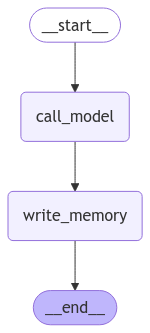

In [21]:
from IPython.display import Image, display

from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import StateGraph, MessagesState, START, END
from langchain_core.runnables.config import RunnableConfig
from langgraph.checkpoint.memory import MemorySaver
from langgraph.store.base import BaseStore

# Initialize the model
model = ChatOpenAI(model="gpt-4o", temperature=0)

# Schema 
class UserProfile(BaseModel):
    """ Profile of a user """
    user_name: str = Field(description="The user's preferred name")
    user_location: str = Field(description="The user's location")
    interests: list = Field(description="A list of the user's interests")

# Create the extractor
trustcall_extractor = create_extractor(
    model,
    tools=[UserProfile],
    tool_choice="UserProfile", # Enforces use of the UserProfile tool
)

# Chatbot instruction
MODEL_SYSTEM_MESSAGE = """You are a helpful assistant with memory that provides information about the user. 
If you have memory for this user, use it to personalize your responses.
Here is the memory (it may be empty): {memory}"""

# Extraction instruction
TRUSTCALL_INSTRUCTION = """Create or update the memory (JSON doc) to incorporate information from the following conversation:"""

def call_model(state: MessagesState, config: RunnableConfig, store: BaseStore):

    """Load memory from the store and use it to personalize the chatbot's response."""
    
    # Get the user ID from the config
    user_id = config["configurable"]["user_id"]

    # Retrieve memory from the store
    namespace = ("memory", user_id)
    existing_memory = store.get(namespace, "user_memory")

    # Format the memories for the system prompt
    if existing_memory and existing_memory.value:
        memory_dict = existing_memory.value
        formatted_memory = (
            f"Name: {memory_dict.get('user_name', 'Unknown')}\n"
            f"Location: {memory_dict.get('user_location', 'Unknown')}\n"
            f"Interests: {', '.join(memory_dict.get('interests', []))}"      
        )
    else:
        formatted_memory = None

    # Format the memory in the system prompt
    system_msg = MODEL_SYSTEM_MESSAGE.format(memory=formatted_memory)

    # Respond using memory as well as the chat history
    response = model.invoke([SystemMessage(content=system_msg)]+state["messages"])

    return {"messages": response}

def write_memory(state: MessagesState, config: RunnableConfig, store: BaseStore):

    """Reflect on the chat history and save a memory to the store."""
    
    # Get the user ID from the config
    user_id = config["configurable"]["user_id"]

    # Retrieve existing memory from the store
    namespace = ("memory", user_id)
    existing_memory = store.get(namespace, "user_memory")
        
    # Get the profile as the value from the list, and convert it to a JSON doc
    existing_profile = {"UserProfile": existing_memory.value} if existing_memory else None
    
    # Invoke the extractor
    result = trustcall_extractor.invoke({"messages": [SystemMessage(content=TRUSTCALL_INSTRUCTION)]+state["messages"], "existing": existing_profile})
    
    # Get the updated profile as a JSON object
    updated_profile = result["responses"][0].model_dump()

    # Save the updated profile
    key = "user_memory"
    store.put(namespace, key, updated_profile)

# Define the graph
builder = StateGraph(MessagesState)
builder.add_node("call_model", call_model)
builder.add_node("write_memory", write_memory)
builder.add_edge(START, "call_model")
builder.add_edge("call_model", "write_memory")
builder.add_edge("write_memory", END)

# Store for long-term (across-thread) memory
across_thread_memory = InMemoryStore()

# Checkpointer for short-term (within-thread) memory
within_thread_memory = MemorySaver()

# Compile the graph with the checkpointer fir and store
graph = builder.compile(checkpointer=within_thread_memory, store=across_thread_memory)

# View
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

## ¿Cómo estamos usando TrustCall en el código anterior?

El código anterior demuestra cómo **TrustCall** se utiliza para **extraer, actualizar y almacenar perfiles de usuario estructurados** en un chatbot con **capacidades de memoria**. Integra **LangGraph** para la gestión del flujo de trabajo y usa **TrustCall** para **extraer datos basados en schemas**. Aquí tienes una explicación sencilla paso a paso:

#### Propósito del Código
Este chatbot:
1. **Extrae información del usuario** (nombre, ubicación e intereses) a partir de conversaciones.  
2. **Almacena los datos extraídos** en memoria para **personalizar** futuras interacciones.  
3. **Actualiza la memoria de forma incremental**, sin regenerar el perfil desde cero.  
4. Usa **TrustCall** para manejar la extracción de datos estructurados de manera eficiente.

#### Esquema del Perfil de Usuario
```python
class UserProfile(BaseModel):
    """ Perfil del usuario """
    user_name: str = Field(description="El nombre preferido del usuario")
    user_location: str = Field(description="La ubicación del usuario")
    interests: list = Field(description="Lista de intereses del usuario")
```
- **Define la estructura de datos** para almacenar los detalles del usuario.  
- Incluye:
  - **`user_name`**: Nombre preferido del usuario.  
  - **`user_location`**: Ubicación del usuario.  
  - **`interests`**: Lista de intereses del usuario.  

- Cada campo tiene una **descripción** para guiar a la IA (el modelo LLM) al extraer información.

#### Crear el Extractor TrustCall
```python
trustcall_extractor = create_extractor(
    model,
    tools=[UserProfile],
    tool_choice="UserProfile",
)
```
- Configura **TrustCall** para extraer datos basados en el **esquema `UserProfile`**.  
- **`tool_choice`**: Asegura que la IA (el modelo LLM) solo extraiga los campos especificados en este esquema, evitando datos irrelevantes.

#### Descripción del Flujo de Trabajo

**Paso 1: Responder a los Mensajes (`call_model`)**
```python
def call_model(state: MessagesState, config: RunnableConfig, store: BaseStore):
```
- **Carga la memoria** del usuario desde el almacenamiento.  
- Si la memoria existe, formatea los datos para incluir:
  - **Nombre**  
  - **Ubicación**  
  - **Intereses**  
- La IA responde al usuario utilizando esta **memoria para personalización**:
```python
response = model.invoke([SystemMessage(content=system_msg)]+state["messages"])
```

**Paso 2: Actualizar la Memoria (`write_memory`)**
```python
def write_memory(state: MessagesState, config: RunnableConfig, store: BaseStore):
```
- **Extrae nueva información** de la conversación y **actualiza la memoria**.  

**Pasos Clave:**
1. **Obtener la Memoria Existente:**
```python
existing_profile = {"UserProfile": existing_memory.value} if existing_memory else None
```
- Recupera el perfil actual si existe.  

2. **Invocar el Extractor TrustCall:**
```python
result = trustcall_extractor.invoke({"messages": [SystemMessage(content=TRUSTCALL_INSTRUCTION)]+state["messages"], "existing": existing_profile})
```
- Usa TrustCall para:
  - Analizar los mensajes de la conversación.  
  - Actualizar solo los **campos relevantes** en el perfil, dejando los demás sin cambios.  

3. **Guardar el Perfil Actualizado:**
```python
updated_profile = result["responses"][0].model_dump()
store.put(namespace, key, updated_profile)
```
- Convierte el resultado a JSON y **lo guarda en memoria**.

#### Gestión de Memoria

**Memoria a Corto Plazo (Memoria de Sesión)**
```python
within_thread_memory = MemorySaver()
```
- Mantiene la memoria durante **conversaciones en curso** (temporal).  

**Memoria a Largo Plazo (Memoria Persistente)**
```python
across_thread_memory = InMemoryStore()
```
- Almacena **perfiles de usuario de manera persistente** para **futuras sesiones**.  

#### Graph
```python
builder = StateGraph(MessagesState)
```
- Define un **flujo de trabajo basado en estados** para el chatbot:
1. **INICIO → call_model**:  
   - Responder al usuario utilizando la memoria existente.  
2. **call_model → write_memory**:  
   - Extraer y actualizar la memoria del usuario según la conversación más reciente.  
3. **write_memory → FIN**:  
   - Guardar la memoria actualizada y finalizar el flujo de trabajo.

**Visualización del Graph**
```python
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))
```
- Genera un **diagrama** para visualizar los pasos del flujo de trabajo del chatbot.

#### Escenario de Ejemplo

**Conversación de Entrada:**
```
Humano: Hola, soy Sarah.
IA: Encantado de conocerte, Sarah.
Humano: Soy de Nueva York y me encanta hacer senderismo y fotografía.
```

**Actualización de Memoria:**
```
{
    "user_name": "Sarah",
    "user_location": "Nueva York",
    "interests": ["senderismo", "fotografía"]
}
```

**Siguiente Conversación:**
```
Humano: Dime cuáles son las mejores rutas de senderismo cerca de Nueva York.
IA: Dado que te encanta el senderismo y estás en Nueva York, déjame sugerirte algunas rutas excelentes cerca de ti...
```

## Bien, veamos cómo funciona esta aplicación

In [22]:
# We supply a thread ID for short-term (within-thread) memory
# We supply a user ID for long-term (across-thread) memory 
config = {"configurable": {"thread_id": "1", "user_id": "1"}}

# User input 
input_messages = [HumanMessage(content="Hi, my name is Julio")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

Hi, my name is Julio
================================== Ai Message ==================================

Hello, Julio! It's nice to meet you. How can I assist you today?


In [23]:
# User input 
input_messages = [HumanMessage(content="I'm interested in Gen AI Startups")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

I'm interested in Gen AI Startups
================================== Ai Message ==================================

That's great, Julio! Generative AI is a rapidly growing field with a lot of exciting developments. Are you looking for information on specific startups, trends in the industry, or perhaps advice on getting involved with a generative AI startup? Let me know how I can help!


In [24]:
# Namespace for the memory to save
user_id = "1"
namespace = ("memory", user_id)
existing_memory = across_thread_memory.get(namespace, "user_memory")
existing_memory.dict()

{'value': {'user_name': 'Julio',
  'user_location': '',
  'interests': ['Gen AI Startups']},
 'key': 'user_memory',
 'namespace': ['memory', '1'],
 'created_at': '2025-01-07T10:04:01.754010+00:00',
 'updated_at': '2025-01-07T10:04:01.754012+00:00'}

In [25]:
# The user profile saved as a JSON object
existing_memory.value

{'user_name': 'Julio', 'user_location': '', 'interests': ['Gen AI Startups']}

In [27]:
# User input 
input_messages = [HumanMessage(content="I am also interested in the latest trends about AI Agents")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

I am also interested in the latest trends about AI Agents
================================== Ai Message ==================================

AI agents are evolving rapidly, and several key trends are shaping their development and application:

1. **Increased Autonomy**: AI agents are becoming more autonomous, capable of performing complex tasks without human intervention. This includes decision-making, problem-solving, and adapting to new environments.

2. **Multi-Modal Capabilities**: AI agents are increasingly integrating multiple types of data, such as text, images, and audio, to provide more comprehensive and context-aware interactions.

3. **Personalization**: There's a growing focus on creating AI agents that can tailor their interactions and responses based on individual user preferences and behaviors, enhancing user experience.

4. **Ethical and Responsible AI**: As AI agents become more prevalent,

## Revisemos lo que acabamos de hacer

Este código demuestra cómo el chatbot **recopila, actualiza y recupera las preferencias del usuario** utilizando el **flujo de trabajo basado en graphs** y el **extractor TrustCall** configurado anteriormente. Utiliza tanto **memoria a corto plazo (sesión específica)** como **memoria a largo plazo (persistente)** para **personalizar respuestas** y **actualizar progresivamente el perfil del usuario**. Aquí tienes una explicación paso a paso:

#### Configurar la Memoria
```python
config = {"configurable": {"thread_id": "1", "user_id": "1"}}
```
- **ID de Hilo (`thread_id`)**: Rastrea la **memoria a corto plazo** dentro de la conversación actual (sesión).  
- **ID de Usuario (`user_id`)**: Rastrea la **memoria a largo plazo** a lo largo de múltiples sesiones.  
- Asegura que los datos sean **almacenados y recuperados** en función del ID del usuario ("1").

#### Primera Entrada (Input) del Usuario - Nombre
```python
input_messages = [HumanMessage(content="Hola, mi nombre es Julio")]

# Ejecutar el gráfico
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()
```

**¿Qué sucede aquí?**
1. **Mensaje de Entrada**: El usuario dice que su nombre es "Julio".  
2. **Flujo de Trabajo del Graph**:
   - **Paso 1:** Responde al usuario usando la memoria existente (actualmente vacía).  
   - **Paso 2:** Actualiza la memoria para guardar **"Julio"** como **user_name**.  
3. **Salida**: La IA (el modelo LLM) responde, por ejemplo: *"¡Hola Julio! Encantado de conocerte."*  

#### Segunda Entrada del Usuario - Interés en Startups de IA Generativa
```python
input_messages = [HumanMessage(content="Estoy interesado en Startups de IA Generativa")]

# Ejecutar el gráfico
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()
```

**¿Qué sucede aquí?**
1. **Mensaje de Entrada**: El usuario menciona su interés en **Startups de IA Generativa**.  
2. **Flujo de Trabajo del Graph**:
   - **Paso 1:** Responde en función de la memoria existente (user_name = Julio).  
   - **Paso 2:** Actualiza la memoria, agregando **"Startups de IA Generativa"** a la lista de **intereses**.  
3. **Salida**: La IA responde, por ejemplo: *"¡Eso es genial, Julio! Las startups de IA generativa son fascinantes."*  

#### Recuperar y Examinar la Memoria
```python
user_id = "1"
namespace = ("memory", user_id)
existing_memory = across_thread_memory.get(namespace, "user_memory")
existing_memory.dict()
existing_memory.value
```

**¿Qué sucede aquí?**
1. **Recuperar Memoria**:
   - Obtiene el perfil guardado del usuario (ID = 1) desde la **memoria a largo plazo**.  
2. **Contenido de la Memoria**:
   - Muestra el perfil como un **objeto JSON**:
   ```json
   {
       "user_name": "Julio",
       "user_location": null,
       "interests": ["Startups de IA Generativa"]
   }
   ```
3. **Observaciones Clave**:
   - **Actualizaciones Incrementales**: La memoria solo agregó **nueva información** (interés en Startups de IA Generativa) sin sobrescribir datos existentes (user_name = Julio).  
   - **Preserva Campos No Proporcionados**: Mantiene campos como **ubicación** en **null** si no se ha proporcionado información.

#### Tercera Entrada (Input) del Usuario - Interés Adicional
```python
input_messages = [HumanMessage(content="También me interesan las últimas tendencias sobre Agentes de IA")]

# Ejecutar el gráfico
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()
```

**¿Qué sucede aquí?**
1. **Mensaje de Entrada**: El usuario agrega **Agentes de IA** como otro interés.  
2. **Flujo de Trabajo del Gráfico**:
   - **Paso 1:** Responde usando la memoria actualizada (user_name = Julio, interests = ["Startups de IA Generativa"]).  
   - **Paso 2:** Actualiza la memoria, **agregando** **"Agentes de IA"** a la lista de **intereses**.  
3. **Salida**: La IA responde, por ejemplo: *"Los Agentes de IA son un tema candente, Julio. ¡Gran adición a tus intereses!"*  

#### Memoria Actualizada Después de la Tercera Entrada (Input)
```json
{
    "user_name": "Julio",
    "user_location": null,
    "interests": ["Startups de IA Generativa", "Agentes de IA"]
}
```

#### Reflexiones Finales

Este código demuestra cómo el chatbot:
1. **Recuerda las preferencias del usuario** a lo largo de las sesiones mediante memoria persistente.  
2. **Agrega nueva información de manera incremental** sin sobrescribir datos anteriores.  
3. **Extrae y organiza los detalles del usuario** usando **TrustCall** en un **schema estructurado**.  
4. **Personaliza las interacciones**, haciendo las conversaciones más naturales y amigables.

## ¡Se ve bien! Ahora que sabemos que nuestro chatbot tiene esta memoria a largo plazo más estructurada, podemos continuar nuestra conversación

In [28]:
# We supply a thread ID for short-term (within-thread) memory
# We supply a user ID for long-term (across-thread) memory 
config = {"configurable": {"thread_id": "2", "user_id": "1"}}

# User input 
input_messages = [HumanMessage(content="What online magazines do you recommend for me?")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

What online magazines do you recommend for me?
================================== Ai Message ==================================

Given your interests in Gen AI Startups and AI Agent Startups, I recommend the following online magazines and publications:

1. **TechCrunch** - They frequently cover the latest in technology startups, including AI and machine learning innovations.

2. **VentureBeat** - Known for its focus on transformative technology, VentureBeat often features articles on AI advancements and startup news.

3. **Wired** - While it covers a broad range of tech topics, Wired often delves into AI and the impact of technology on society.

4. **MIT Technology Review** - Offers in-depth articles on emerging technologies, including AI and its applications in various industries.

5. **AI Trends** - Specifically focused on AI, this publication provides insights into the latest trends and developments in

## Cómo ejecutar el código desde Visual Studio Code
* En Visual Studio Code, busca el archivo `026-profile-schema.py`.
* En la terminal, asegúrate de estar en el directorio del archivo y ejecuta:
    * `python 026-profile-schema.py`